dada la falta de buenos resultados intentaremos una prueba de entrenamiento del modelo detectando las clases de lesiones, para ello hemos separaremos las variables correspondientes al tipo de lesiones, tanto malignas como venignas, del resto de variables, para entrenar un modelo multi variables

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score


# Suprimir todos los warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
#cargamos el dataset
df = pd.read_csv ('/Users/luiseduardogarciablanco/Desktop/nueva data cancer/prueba_data_18_19_20/metadata_18_19_20_sin_NaN_code.csv', index_col=0)
df

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,age_approx,...,sex_male,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_torso,anatom_site_general_upper extremity
19_ISIC_0000000,0,1,0,0,0,0,0,0,0,55,...,0,1,0,0,0,0,0,0,0,0
19_ISIC_0000001,0,1,0,0,0,0,0,0,0,30,...,0,1,0,0,0,0,0,0,0,0
19_ISIC_0000002,1,0,0,0,0,0,0,0,0,60,...,0,0,0,0,0,0,0,0,0,1
19_ISIC_0000003,0,1,0,0,0,0,0,0,0,30,...,1,0,0,0,0,0,0,0,0,1
19_ISIC_0000004,1,0,0,0,0,0,0,0,0,80,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20_ISIC_9999134,0,0,0,0,0,0,0,0,1,50,...,1,0,0,0,0,0,0,0,1,0
20_ISIC_9999320,0,0,0,0,0,0,0,0,1,65,...,1,0,0,0,0,0,0,0,1,0
20_ISIC_9999515,0,0,0,0,0,0,0,0,1,20,...,1,0,0,0,1,0,0,0,0,0
20_ISIC_9999666,0,0,0,0,0,0,0,0,1,50,...,1,0,0,0,1,0,0,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53767 entries, 19_ISIC_0000000 to 20_ISIC_9999806
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   MEL                                  53767 non-null  int64
 1   NV                                   53767 non-null  int64
 2   BCC                                  53767 non-null  int64
 3   AK                                   53767 non-null  int64
 4   BKL                                  53767 non-null  int64
 5   DF                                   53767 non-null  int64
 6   VASC                                 53767 non-null  int64
 7   SCC                                  53767 non-null  int64
 8   UNK                                  53767 non-null  int64
 9   age_approx                           53767 non-null  int64
 10  sex_female                           53767 non-null  int64
 11  sex_male                           

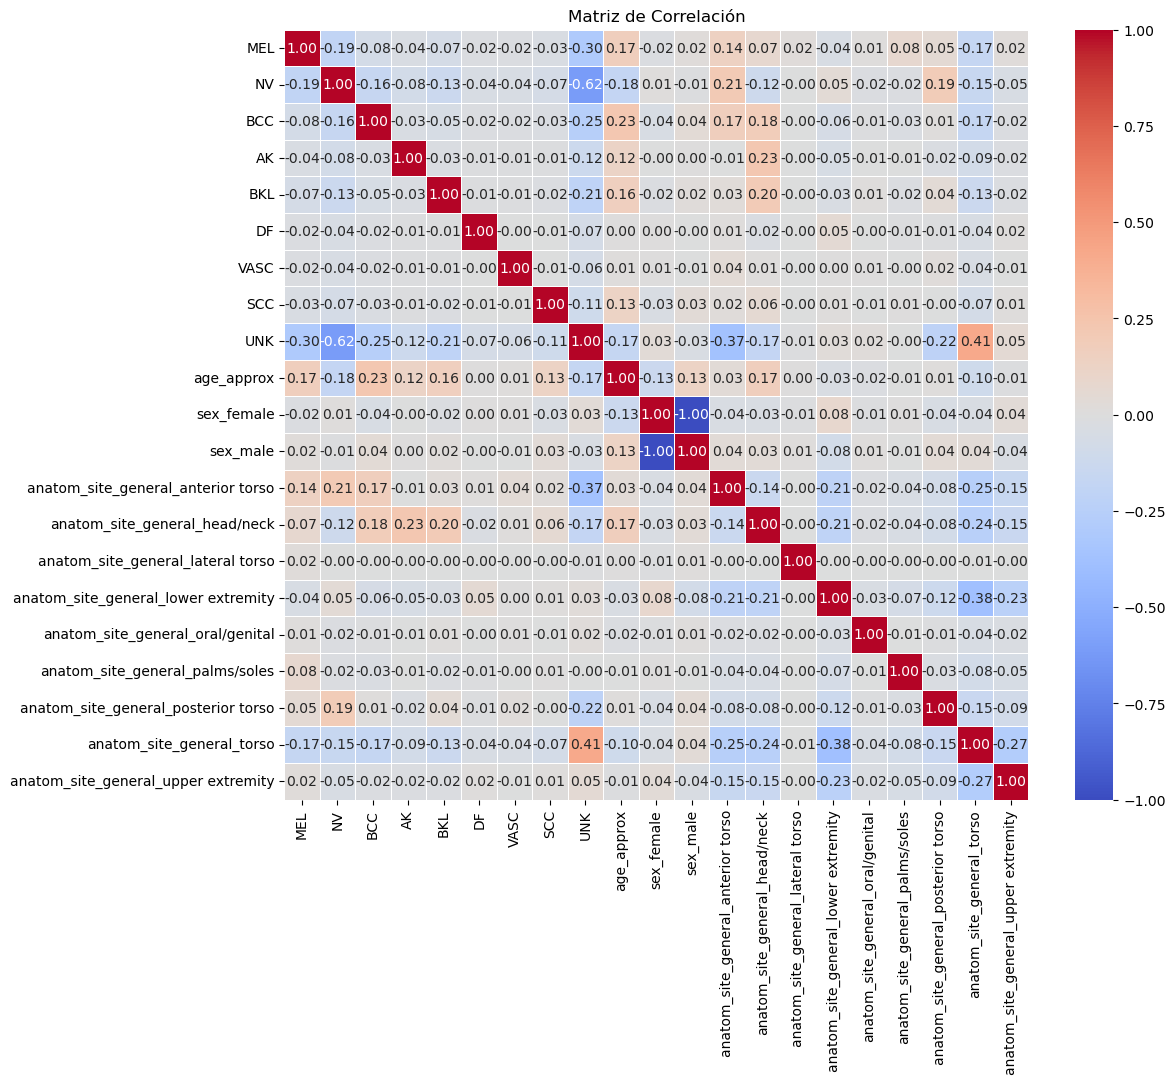

In [29]:
# Crear una matriz de correlación
correlation_matrix = df.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))  # Ajusta el tamaño de la figura según tu preferencia
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Agregar título y mostrar la gráfica
plt.title('Matriz de Correlación')
plt.show()

MEL  --  Melanoma
NV   --  Melanocytic nevus
BCC  --  Basal cell carcinoma
AK   --  Actinic keratosis / Bowen’s disease (intraepithelial carcinoma)
BKL  --  Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)
DF   --  Dermatofibroma
VASC --  Vascular lesion
SCC  --  Squamous cell carcinoma
UNK  --  None of the others

hacemos primero una prueba de entrenamiento de un modelo multivariable sin imagenes

In [47]:
# Separar las características y las columnas objetivo
X = df.drop(columns=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'])# eliminamos la columna UNK para hacer pruebas
y = df[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']]# eliminamos la columna UNK para hacer pruebas

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
# Crear el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

# Evaluar el rendimiento
print(classification_report(y_test, y_pred, target_names=y.columns))

              precision    recall  f1-score   support

         MEL       0.54      0.05      0.10       938
          NV       0.79      0.81      0.80      3075
         BCC       0.63      0.04      0.07       660
          AK       0.00      0.00      0.00       150
         BKL       0.64      0.02      0.03       453
          DF       0.00      0.00      0.00        48
        VASC       0.00      0.00      0.00        36
         SCC       0.40      0.02      0.03       116

   micro avg       0.78      0.47      0.59      5476
   macro avg       0.38      0.12      0.13      5476
weighted avg       0.67      0.47      0.48      5476
 samples avg       0.24      0.24      0.24      5476



In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mejorar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_dep

In [53]:
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best, target_names=y.columns))

              precision    recall  f1-score   support

         MEL       0.54      0.05      0.10       938
          NV       0.79      0.81      0.80      3075
         BCC       0.63      0.04      0.07       660
          AK       0.00      0.00      0.00       150
         BKL       0.83      0.01      0.02       453
          DF       0.00      0.00      0.00        48
        VASC       0.00      0.00      0.00        36
         SCC       0.40      0.02      0.03       116

   micro avg       0.78      0.47      0.58      5476
   macro avg       0.40      0.12      0.13      5476
weighted avg       0.69      0.47      0.48      5476
 samples avg       0.24      0.24      0.24      5476



In [43]:
from sklearn.multioutput import MultiOutputClassifier 
#Este wrapper permite convertir modelos que sólo soportan una única etiqueta en modelos capaces de manejar múltiples etiquetas.
from sklearn.metrics import classification_report


# Definir los modelos

models = {

    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42)
}

# Entrenar cada modelo usando MultiOutputClassifier
for name, base_model in models.items():
    print(f"\n{name} Model Training")
    
    # Convertir el modelo base en un modelo multi-output
    model = MultiOutputClassifier(base_model)
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    


Gradient Boosting Model Training

XGBoost Model Training

LightGBM Model Training
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3682, number of negative: 39331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 43013, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085602 -> initscore=-2.368557
[LightGBM] [Info] Start training from score -2.368557
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11984, number of negative: 31029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise

In [56]:
pd.set_option('display.max_rows', None)  # Muestra todas las filas  
for name, base_model in models.items():
 # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Evaluar el rendimiento
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=y.columns))

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

         MEL       0.54      0.05      0.10       938
          NV       0.79      0.81      0.80      3075
         BCC       0.63      0.04      0.07       660
          AK       0.00      0.00      0.00       150
         BKL       0.64      0.02      0.03       453
          DF       0.00      0.00      0.00        48
        VASC       0.00      0.00      0.00        36
         SCC       0.40      0.02      0.03       116

   micro avg       0.78      0.47      0.59      5476
   macro avg       0.38      0.12      0.13      5476
weighted avg       0.67      0.47      0.48      5476
 samples avg       0.24      0.24      0.24      5476

Classification Report for XGBoost:

              precision    recall  f1-score   support

         MEL       0.54      0.05      0.10       938
          NV       0.79      0.81      0.80      3075
         BCC       0.63      0.04      0.07       

may variables que no reconoce el modelo, en general y tras una pruba muy basica no obtenemos unos resultados que motiven a realizar pruebas de parametrizacion de los modelos entrenados, asi que pasaremos a seguir realizando pruebas de otro tipo de datos y modelos